In [37]:
import numpy as np
import pandas as pd

In [38]:
data = pd.read_csv('dava_sonuclari.csv')
data.head()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0


## VERİ SETİ İNCELEME : 
Case Type: Davanın türü (Criminal, Civil, Commercial)  
Case Duration (Days): Davanın süresi (gün olarak)  
Judge Experience (Years): Hakimin deneyim yılı  
Number of Witnesses: Tanık sayısı  
Legal Fees (USD): Hukuk masrafları (USD olarak)  
Plaintiff's Reputation: Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)  
Defendant's Wealth (USD): Davalının serveti  
Number of Evidence Items: Delil sayısı  
Number of Legal Precedents: İlgili hukuki emsal sayısı  
Settlement Offered (USD): Teklif edilen uzlaşma miktarı  
Severity: Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)  
Outcome: Davanın sonucu (0: Kaybetmek, 1: Kazanmak)  

## Görevler

### Veri Ön İşleme:
* Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.  
* Gerektiğinde eksik verileri doldurun veya çıkarın.  
* Özelliklerin ölçeklendirilmesi gibi gerekli veri dönüşümlerini uygulayın. 

### Veri Setini Ayırma:
* Veri setini eğitim ve test setleri olarak ayırın (örn. %80 eğitim, %20 test).  

### Model Kurulumu:
* Karar ağacı modelini oluşturun ve eğitim verileri üzerinde eğitin.

### Modeli Değerlendirme:
* Test verilerini kullanarak modelin doğruluğunu değerlendirin.
* Doğruluk, precision, recall ve F1-score gibi performans metriklerini hesaplayın.

### Sonuçları Görselleştirme:
* Karar ağacının yapısını görselleştirin.
* Karar ağacının nasıl çalıştığını ve hangi özelliklerin davanın sonucunu belirlemede en etkili olduğunu açıklayın.

In [39]:
# Veri Ön İşleme
print(data.info()) #eksik veri yok, veri tipleri doğru
print(data.describe()) # aykırı veri yok

# Eksik değerleri kontrol edelim:
print(data.isnull().sum()) #eksik değer yok

# Case Type sütunu kategorik olduğu için sayısal değerlere dönüştürüldü
data['Case Type'] = data['Case Type'].map({'Criminal':0, 'Civil':1, 'Commercial':2})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Case Type                   200 non-null    object
 1   Case Duration (Days)        200 non-null    int64 
 2   Judge Experience (Years)    200 non-null    int64 
 3   Number of Witnesses         200 non-null    int64 
 4   Legal Fees (USD)            200 non-null    int64 
 5   Plaintiff's Reputation      200 non-null    int64 
 6   Defendant's Wealth (USD)    200 non-null    int64 
 7   Number of Evidence Items    200 non-null    int64 
 8   Number of Legal Precedents  200 non-null    int64 
 9   Settlement Offered (USD)    200 non-null    int64 
 10  Severity                    200 non-null    int64 
 11  Outcome                     200 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 18.9+ KB
None
       Case Duration (Days)  Judge Experience (Years) 

In [40]:
# Veri Setini Ayırma
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [41]:
# Model Kurulumu
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)


DecisionTreeClassifier(random_state=42)

In [42]:
# Model Değerlendirme
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1-score: 0.00


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


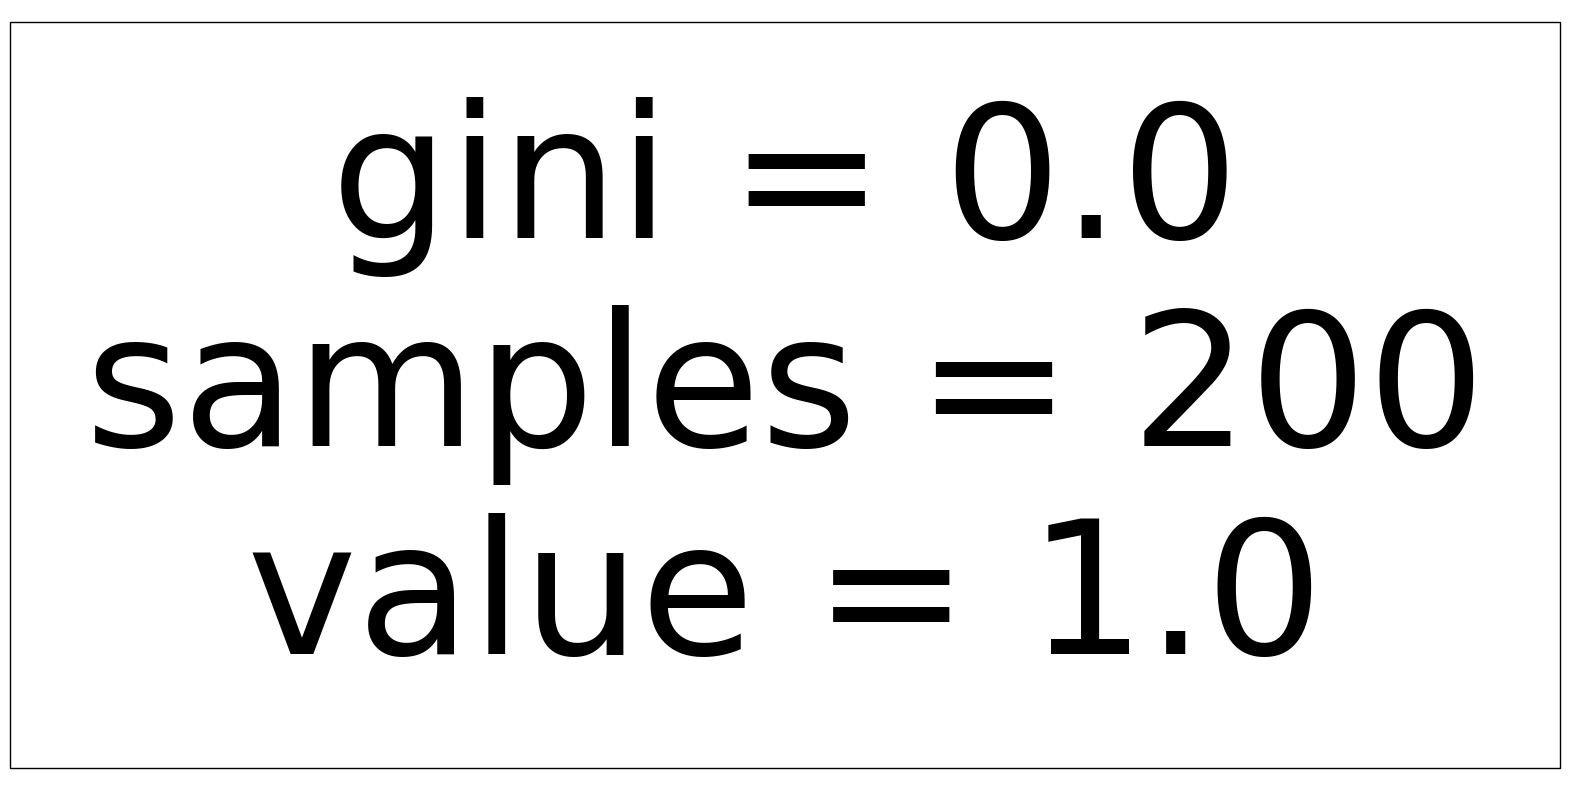

Case Type                     0.0
Case Duration (Days)          0.0
Judge Experience (Years)      0.0
Number of Witnesses           0.0
Legal Fees (USD)              0.0
Plaintiff's Reputation        0.0
Defendant's Wealth (USD)      0.0
Number of Evidence Items      0.0
Number of Legal Precedents    0.0
Settlement Offered (USD)      0.0
Severity                      0.0
dtype: float64


In [43]:
# Sonuçları Görselleştirme
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(model,
               feature_names=X.columns,
               class_names=['Lose', 'Win'],
               filled=True)
plt.show()

importance = pd.Series(model.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))

# Model, hedef değişkenin tek sınıfa ait olması nedeniyle dallanma yapamamıştır. 
# Bütün gözlemler aynı sınıfta olduğundan, hiçbir özellik sonucu belirlemede etkili olmamıştır.
# Dolayısıyla feature_importances_ değerleri 0’dır ve karar ağacı kök düğümden oluşmaktadır.

